In [64]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso

In [40]:
df = pd.read_csv('NIFTY_5_minute_with_indicators_.csv')
df.head()

,date,close,high,low,open,volume,sma5,sma10,sma15,sma20,ema5,ema10,ema15,ema20,upperband,middleband,lowerband,HT_TRENDLINE,KAMA10,KAMA20,KAMA30,SAR,TRIMA5,TRIMA10,TRIMA20,ADX5,ADX10,ADX20,APO,CCI5,CCI10,CCI15,macd510,macd520,macd1020,macd1520,macd1226,MFI,MOM10,MOM15,MOM20,ROC5,ROC10,ROC20,PPO,RSI14,RSI8,slowk,slowd,fastk,fastd,fastksr,fastdsr,ULTOSC,WILLR,ATR,Trange,TYPPRICE,HT_DCPERIOD,BETA
0,2015-01-09 14:30:00+05:30,18519.75,18555.30,18504.20,18543.15,0,18531.34,18536.755,18555.436667,18568.0875,18531.278801,18540.522241,18551.430586,18562.991555,18556.526536,18531.34,18506.153464,18571.345762,18546.436263,18579.306693,18568.617343,18859.65,18534.838889,18529.988333,18567.410000,42.585329,43.127416,49.929757,-25.418590,-44.369873,-37.726451,-62.143617,-9.243440,-31.712754,-22.469245,-11.570151,-32.526444,0.0,-62.15,-56.90,-99.20,-0.008099,-0.334465,-0.532791,-0.136878,36.377928,36.720430,52.590777,55.753718,35.921134,52.590777,58.193785,79.677031,52.084051,-68.287861,35.354720,51.10,18526.416667,23.549276,0.447165
1,2015-01-09 14:35:00+05:30,18562.80,18562.80,18519.75,18519.75,0,18541.07,18534.800,18553.170000,18563.8400,18541.785868,18544.572743,18552.851763,18562.973312,18569.549087,18541.07,18512.590913,18570.232848,18546.667710,18578.594876,18568.538589,18859.65,18538.027778,18529.805000,18561.535455,40.510772,42.608216,49.541467,-26.664423,91.566785,61.162604,-9.366189,-2.786875,-21.187444,-18.400513,-10.129583,-28.681094,0.0,-19.55,-34.00,-84.95,0.262772,-0.105207,-0.455551,-0.143594,46.662033,53.493322,62.559047,59.277079,88.971041,62.559047,100.000000,85.410749,56.719836,-34.112520,35.904382,43.05,18548.450000,23.214823,0.468669
2,2015-01-09 14:40:00+05:30,18579.55,18585.50,18544.70,18562.80,0,18547.54,18534.585,18551.796667,18561.9000,18554.373912,18550.932244,18556.189042,18564.552044,18589.944264,18547.54,18505.135736,18569.789395,18546.829228,18578.611592,18568.654290,18859.65,18542.394444,18532.973333,18556.235909,33.003219,40.282886,48.674467,-26.852564,143.508195,177.757003,48.762921,3.441668,-10.178132,-13.619754,-8.370031,-24.005323,0.0,-2.15,-20.60,-38.80,0.174420,-0.011571,-0.208397,-0.144607,50.045483,58.396805,72.524534,62.558119,92.681427,72.524534,100.000000,86.064595,59.507476,-15.231226,36.254069,40.80,18569.916667,22.690038,0.677242
3,2015-01-09 14:45:00+05:30,18575.35,18586.75,18557.05,18570.35,0,18555.80,18540.210,18550.360000,18559.5925,18561.365941,18555.371836,18558.584162,18565.580421,18600.502841,18555.80,18511.097159,18569.577340,18548.744217,18578.543121,18568.708707,18859.65,18555.988889,18538.668333,18551.780909,27.346256,38.092524,47.824075,-29.024359,89.641381,133.743788,64.914792,5.994105,-4.214480,-10.208547,-7.002410,-20.403448,0.0,56.25,-21.55,-46.15,0.222833,0.303740,-0.247832,-0.156289,49.202670,56.684121,89.280885,74.788155,86.190188,89.280885,93.833477,97.944492,61.984766,-18.795078,35.785922,29.70,18573.050000,22.218714,0.389044
4,2015-01-09 14:50:00+05:30,18613.50,18630.15,18575.35,18575.35,0,18570.19,18550.915,18552.043333,18561.9700,18578.743961,18565.940593,18565.448642,18570.144190,18630.779088,18570.19,18509.600912,18570.205404,18558.469912,18579.347756,18568.939384,18859.65,18572.022222,18546.263333,18549.230000,31.175501,35.283455,46.168208,-28.130128,126.216545,181.822860,141.433027,12.803368,8.599770,-4.203566,-4.700931,-14.305643,0.0,107.05,25.25,47.55,0.388047,0.578447,0.256114,-0.151460,56.387368,66.793927,88.550694,83.452038,86.780468,88.550694,100.000000,97.944492,58.960874,-11.063123,37.144070,54.80,18606.333333,21.951435,0.304212


In [41]:
df.tail()

,date,close,high,low,open,volume,sma5,sma10,sma15,sma20,ema5,ema10,ema15,ema20,upperband,middleband,lowerband,HT_TRENDLINE,KAMA10,KAMA20,KAMA30,SAR,TRIMA5,TRIMA10,TRIMA20,ADX5,ADX10,ADX20,APO,CCI5,CCI10,CCI15,macd510,macd520,macd1020,macd1520,macd1226,MFI,MOM10,MOM15,MOM20,ROC5,ROC10,ROC20,PPO,RSI14,RSI8,slowk,slowd,fastk,fastd,fastksr,fastdsr,ULTOSC,WILLR,ATR,Trange,TYPPRICE,HT_DCPERIOD,BETA
136134,2022-10-21 15:05:00+05:30,40757.5,40758.95,40705.45,40705.45,0,40684.10,40690.850,40716.973333,40757.6975,40706.760449,40710.878792,40729.787794,40746.350887,40775.105872,40684.10,40593.094128,40826.412799,40765.645214,40784.852556,40852.682036,13411.6,40680.000024,40674.511667,40742.543182,43.735708,41.426995,31.422565,-104.732051,135.707316,105.763267,32.889634,-4.118343,-39.590438,-35.472095,-16.563093,-39.950571,0.0,-43.25,-89.85,-186.35,0.258657,-0.106003,-0.455136,-0.256638,49.838594,54.878753,81.570070,54.644491,99.020932,81.570070,100.000000,100.000000,49.099306,-36.856835,67.071983,53.95,40740.633333,27.892335,0.596826
136135,2022-10-21 15:10:00+05:30,40743.3,40778.40,40740.35,40760.00,0,40703.43,40687.805,40710.593333,40746.4750,40718.940299,40716.773557,40731.476820,40746.060327,40795.458165,40703.43,40611.401835,40820.205582,40765.368070,40783.030316,40851.256089,13411.6,40707.533358,40675.483333,40730.112273,40.388687,38.064819,30.297635,-94.438141,95.237248,151.046896,72.459533,2.166742,-27.120027,-29.286769,-14.583507,-34.984137,0.0,-30.45,-95.70,-224.45,0.237781,-0.074680,-0.547870,-0.231473,48.494266,52.265559,86.826321,74.007161,79.051030,86.826321,90.377348,96.792449,45.000107,-37.538316,64.998985,38.05,40754.016667,27.807368,0.686352
136136,2022-10-21 15:15:00+05:30,40817.1,40826.65,40739.10,40744.85,0,40741.21,40703.700,40713.640000,40743.1400,40751.660200,40735.014729,40742.179717,40752.826010,40833.778474,40741.21,40648.641526,40810.755099,40771.289698,40783.428066,40850.853612,13411.6,40741.038913,40686.988333,40720.890000,42.332059,35.240085,28.802905,-85.514103,112.082145,167.128925,143.681165,16.645471,-1.165810,-17.811281,-10.646293,-24.807198,0.0,158.95,45.70,-66.70,0.464948,0.390943,-0.163145,-0.209638,55.250173,62.789775,91.066504,86.487632,95.127551,91.066504,100.000000,96.792449,56.010406,-4.425394,66.609771,87.55,40794.283333,27.374338,-0.361515
136137,2022-10-21 15:20:00+05:30,40873.9,40873.90,40790.20,40816.20,0,40779.36,40721.645,40725.913333,40745.8925,40792.406800,40760.266596,40758.644753,40764.356866,40898.253946,40779.36,40660.466054,40802.395357,40784.332112,40784.346693,40851.128799,13411.6,40773.111136,40705.850000,40715.350455,46.673322,34.059649,27.786818,-72.564423,123.099478,161.587282,178.447286,32.140204,28.049934,-4.090270,-5.712113,-12.020055,0.0,179.45,184.10,55.05,0.468867,0.440969,0.134864,-0.177912,59.638255,68.833793,91.392860,89.761895,100.000000,91.392860,100.000000,96.792449,63.236350,-0.000000,67.830502,83.70,40846.000000,26.823269,-0.057402
136138,2022-10-21 15:25:00+05:30,40881.6,40897.65,40848.50,40873.20,0,40814.68,40738.875,40735.010000,40745.8925,40822.137866,40782.327215,40774.014159,40775.522879,40929.068143,40814.68,40700.291857,40795.605582,40796.275295,40784.751493,40851.571522,13411.6,40813.866691,40730.975000,40712.508182,51.219885,33.592755,27.009828,-50.362821,104.536992,139.933436,167.247522,39.810651,46.614988,6.804336,-1.508720,-1.250412,0.0,172.30,136.45,0.00,0.433853,0.423245,0.000000,-0.123490,60.207904,69.598840,95.592292,92.683885,91.649324,95.592292,100.000000,100.000000,64.949909,-5.596234,66.496180,49.15,40875.916667,26.613559,-0.722902


In [42]:
df.shape

(136139, 60)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136139 entries, 0 to 136138
Data columns (total 60 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   date          136139 non-null  object 
 1   close         136139 non-null  float64
 2   high          136139 non-null  float64
 3   low           136139 non-null  float64
 4   open          136139 non-null  float64
 5   volume        136139 non-null  int64  
 6   sma5          136139 non-null  float64
 7   sma10         136139 non-null  float64
 8   sma15         136139 non-null  float64
 9   sma20         136139 non-null  float64
 10  ema5          136139 non-null  float64
 11  ema10         136139 non-null  float64
 12  ema15         136139 non-null  float64
 13  ema20         136139 non-null  float64
 14  upperband     136139 non-null  float64
 15  middleband    136139 non-null  float64
 16  lowerband     136139 non-null  float64
 17  HT_TRENDLINE  136139 non-null  float64
 18  KAMA

In [44]:
drop_cols = []
drop_cols.append('date')
drop_cols.append('volume')

In [45]:
df.drop(drop_cols, axis=1, inplace=True)

In [46]:
df.describe()

,close,high,low,open,sma5,sma10,sma15,sma20,ema5,ema10,ema15,ema20,upperband,middleband,lowerband,HT_TRENDLINE,KAMA10,KAMA20,KAMA30,SAR,TRIMA5,TRIMA10,TRIMA20,ADX5,ADX10,ADX20,APO,CCI5,CCI10,CCI15,macd510,macd520,macd1020,macd1520,macd1226,MFI,MOM10,MOM15,MOM20,ROC5,ROC10,ROC20,PPO,RSI14,RSI8,slowk,slowd,fastk,fastd,fastksr,fastdsr,ULTOSC,WILLR,ATR,Trange,TYPPRICE,HT_DCPERIOD,BETA
count,136139.000000,136139.000000,136139.000000,136139.000000,136139.000000,136139.000000,136139.000000,136139.000000,136139.000000,136139.000000,136139.000000,136139.000000,136139.000000,136139.000000,136139.000000,136139.000000,136139.000000,136139.000000,136139.000000,136139.000000,136139.000000,136139.000000,136139.000000,136139.000000,136139.000000,136139.000000,136139.000000,136139.000000,136139.000000,136139.000000,136139.000000,136139.000000,136139.000000,136139.000000,136139.000000,136139.0,136139.000000,136139.000000,136139.000000,136139.000000,136139.000000,136139.000000,136139.000000,136139.000000,136139.000000,1.361390e+05,1.361390e+05,136139.000000,1.361390e+05,136139.000000,1.361390e+05,136139.000000,136139.000000,136139.000000,136139.000000,136139.000000,136139.000000,136139.000000
mean,26139.398571,26160.624028,26117.836673,26139.578214,26139.070746,26138.662802,26138.256339,26137.849736,26139.071183,26138.663532,26138.256162,26137.848862,26188.506449,26139.070746,26089.635043,26136.946674,26138.737234,26137.896480,26137.114702,15423.149109,26139.070648,26138.662358,26137.849353,40.468837,30.265500,23.200598,1.139263,1.312133,2.120807,2.771007,0.407651,1.222321,0.814671,0.407299,1.140016,0.0,1.630385,2.443361,3.257383,0.003675,0.007363,0.014744,0.004066,50.777919,50.760028,5.115728e+01,5.115703e+01,51.157526,5.115728e+01,50.159251,5.015920e+01,50.726887,-48.209645,44.167425,44.170514,26139.286424,22.005213,0.610813
std,7002.290185,7007.237877,6997.048848,7002.219809,7002.010876,7001.685429,7001.361247,7001.035157,7001.954203,7001.564618,7001.173549,7000.779312,7014.135730,7002.010876,6990.419530,7000.801527,7001.441117,7000.727823,7000.496967,3302.281423,7002.032984,7001.740757,7001.165096,15.521055,12.757445,10.205206,71.906059,93.678016,106.137749,112.052478,29.391388,68.486321,41.736254,19.367130,52.113097,0.0,142.009891,174.760121,202.402643,0.393277,0.561899,0.799438,0.284880,13.087868,16.182892,2.420194e+01,2.237169e+01,29.163285,2.420194e+01,41.132129,3.214871e+01,9.929245,29.098770,26.240757,45.830824,7002.172635,5.122119,0.645501
min,13496.650000,13618.050000,13411.600000,13494.900000,13603.440000,13628.900000,13636.510000,13640.292500,13618.203274,13648.530173,13656.752739,13670.353998,13645.282342,13603.440000,13238.786279,13644.984375,13637.909770,13645.361636,13647.356848,13411.600000,13584.422222,13626.798333,13636.438182,7.685591,6.549876,5.018825,-1345.666667,-166.666667,-333.333333,-500.000000,-649.391848,-1279.460012,-690.534882,-296.939495,-788.725544,0.0,-2765.050000,-2758.950000,-3073.750000,-11.443559,-12.670430,-13.174024,-5.931618,3.962732,1.160209,-1.138941e-12,-2.419003e-12,0.000000,-1.138941e-12,0.000000,-2.457294e-13,5.985018,-100.000000,4.861554,0.000000,13536.400000,11.013816,-19.514258
25%,19401.325000,19416.075000,19386.075000,19402.275000,19400.705000,19402.457500,19402.570000,19402.721250,19400.911561,19402.338464,19402.557967,19402.534394,19437.442641,19400.705000,19359.174300,19402.562992,19398.030647,19400.023065,19402.017668,13411.600000,19399.836111,19401.175000,19401.909091,28.634217,20.559068,15.407777,-22.847756,-81.760400,-81.089700,-80.410267,-9.018653,-22.312039,-14.102917,-6.762631,-18.513944,0.0,-44.250000,-55.800000,-66.900000,-0.124302,-0.177218,-0.266532,-0.091599,42.020452,39.691534,3.058768e+01,3.254367e+01,25.892801,3.058768e+01,0.000000,2.154438e+01,44.061468,-73.595208,26.283307,21.700000,19400.808333,18.246847,0.277822
50%,25557.800000,25571.400000,25545.400000,25558.100000,25558.690000,25558.190000,25556.706667,25556.922500,25558.838909,25557.032240,25556.192472,25556.213529,25

### Plot the target feature

<Axes: >

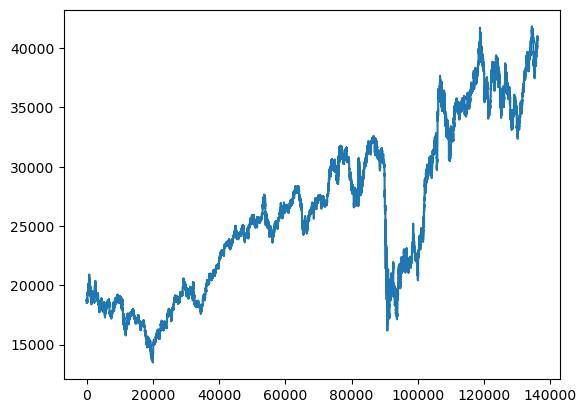

In [47]:
df['close'].plot()

<Axes: >

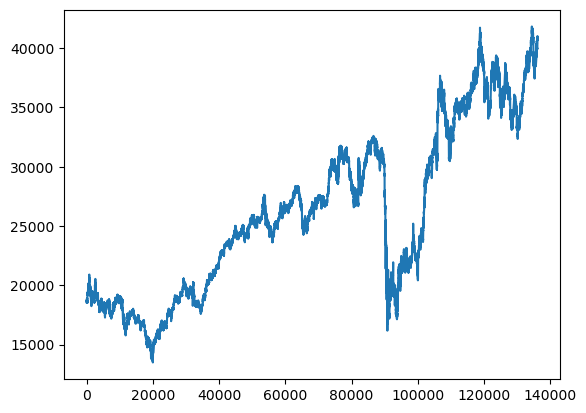

In [48]:
df['open'].plot()

<Axes: >

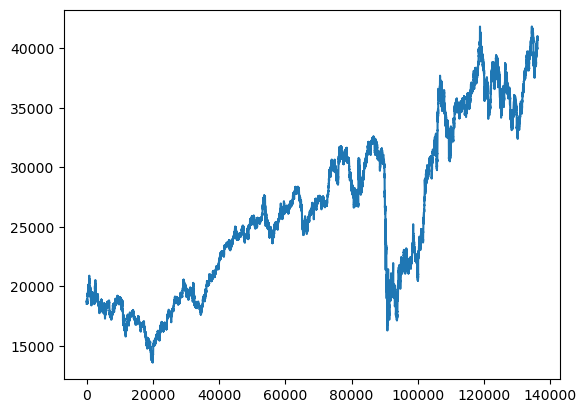

In [49]:
df['high'].plot()

<Axes: >

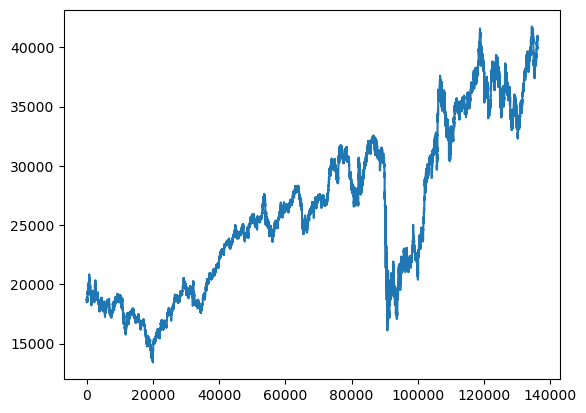

In [50]:
df['low'].plot()

<Axes: >

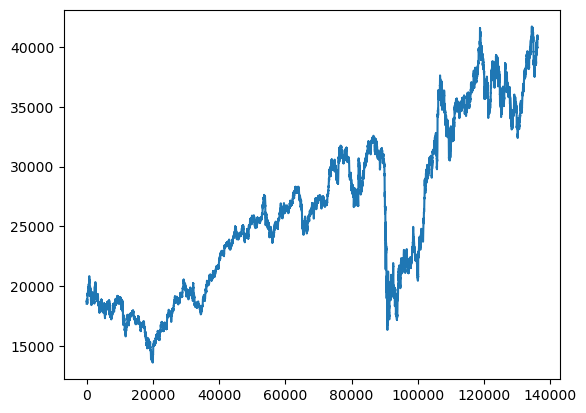

In [51]:
df['sma5'].plot()

<Axes: >

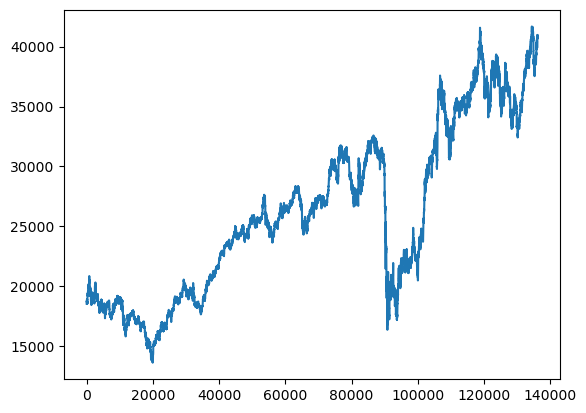

In [52]:
df['ema5'].plot()

<Axes: >

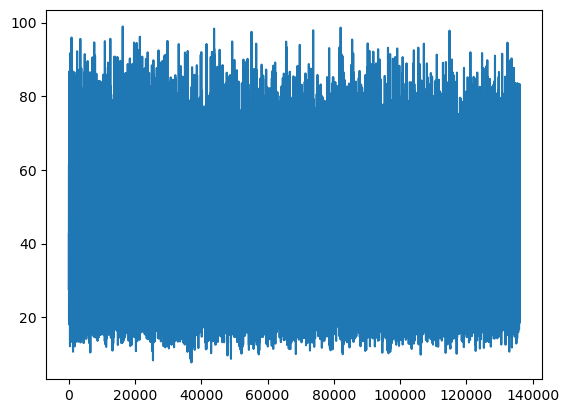

In [53]:
df['ADX5'].plot()

<Axes: >

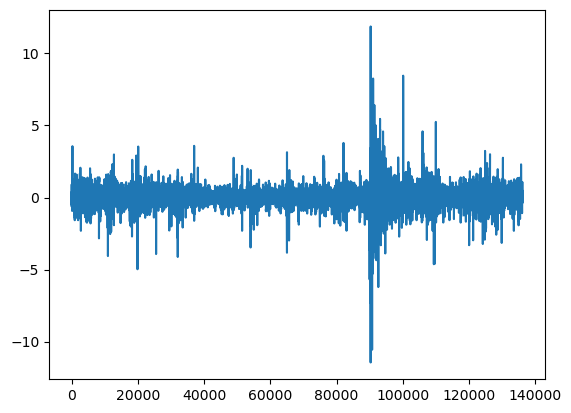

In [54]:
df['ROC5'].plot()

<Axes: >

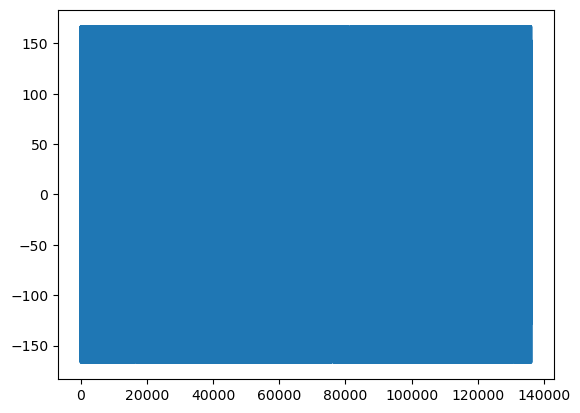

In [55]:
df['CCI5'].plot()

### Create the target feature

In [56]:
cols = df.columns.tolist()
for col in cols:
    df[f'Lag_{col}'] = df[col].shift(1)
cols.remove('close')

df.drop(cols, axis=1, inplace=True)
df.dropna(subset=df.columns.tolist(), inplace=True)

In [57]:
df.head()

,close,Lag_close,Lag_high,Lag_low,Lag_open,Lag_sma5,Lag_sma10,Lag_sma15,Lag_sma20,Lag_ema5,Lag_ema10,Lag_ema15,Lag_ema20,Lag_upperband,Lag_middleband,Lag_lowerband,Lag_HT_TRENDLINE,Lag_KAMA10,Lag_KAMA20,Lag_KAMA30,Lag_SAR,Lag_TRIMA5,Lag_TRIMA10,Lag_TRIMA20,Lag_ADX5,Lag_ADX10,Lag_ADX20,Lag_APO,Lag_CCI5,Lag_CCI10,Lag_CCI15,Lag_macd510,Lag_macd520,Lag_macd1020,Lag_macd1520,Lag_macd1226,Lag_MFI,Lag_MOM10,Lag_MOM15,Lag_MOM20,Lag_ROC5,Lag_ROC10,Lag_ROC20,Lag_PPO,Lag_RSI14,Lag_RSI8,Lag_slowk,Lag_slowd,Lag_fastk,Lag_fastd,Lag_fastksr,Lag_fastdsr,Lag_ULTOSC,Lag_WILLR,Lag_ATR,Lag_Trange,Lag_TYPPRICE,Lag_HT_DCPERIOD,Lag_BETA
1,18562.80,18519.75,18555.30,18504.20,18543.15,18531.34,18536.755,18555.436667,18568.0875,18531.278801,18540.522241,18551.430586,18562.991555,18556.526536,18531.34,18506.153464,18571.345762,18546.436263,18579.306693,18568.617343,18859.65,18534.838889,18529.988333,18567.410000,42.585329,43.127416,49.929757,-25.418590,-44.369873,-37.726451,-62.143617,-9.243440,-31.712754,-22.469245,-11.570151,-32.526444,0.0,-62.15,-56.90,-99.20,-0.008099,-0.334465,-0.532791,-0.136878,36.377928,36.720430,52.590777,55.753718,35.921134,52.590777,58.193785,79.677031,52.084051,-68.287861,35.354720,51.10,18526.416667,23.549276,0.447165
2,18579.55,18562.80,18562.80,18519.75,18519.75,18541.07,18534.800,18553.170000,18563.8400,18541.785868,18544.572743,18552.851763,18562.973312,18569.549087,18541.07,18512.590913,18570.232848,18546.667710,18578.594876,18568.538589,18859.65,18538.027778,18529.805000,18561.535455,40.510772,42.608216,49.541467,-26.664423,91.566785,61.162604,-9.366189,-2.786875,-21.187444,-18.400513,-10.129583,-28.681094,0.0,-19.55,-34.00,-84.95,0.262772,-0.105207,-0.455551,-0.143594,46.662033,53.493322,62.559047,59.277079,88.971041,62.559047,100.000000,85.410749,56.719836,-34.112520,35.904382,43.05,18548.450000,23.214823,0.468669
3,18575.35,18579.55,18585.50,18544.70,18562.80,18547.54,18534.585,18551.796667,18561.9000,18554.373912,18550.932244,18556.189042,18564.552044,18589.944264,18547.54,18505.135736,18569.789395,18546.829228,18578.611592,18568.654290,18859.65,18542.394444,18532.973333,18556.235909,33.003219,40.282886,48.674467,-26.852564,143.508195,177.757003,48.762921,3.441668,-10.178132,-13.619754,-8.370031,-24.005323,0.0,-2.15,-20.60,-38.80,0.174420,-0.011571,-0.208397,-0.144607,50.045483,58.396805,72.524534,62.558119,92.681427,72.524534,100.000000,86.064595,59.507476,-15.231226,36.254069,40.80,18569.916667,22.690038,0.677242
4,18613.50,18575.35,18586.75,18557.05,18570.35,18555.80,18540.210,18550.360000,18559.5925,18561.365941,18555.371836,18558.584162,18565.580421,18600.502841,18555.80,18511.097159,18569.577340,18548.744217,18578.543121,18568.708707,18859.65,18555.988889,18538.668333,18551.780909,27.346256,38.092524,47.824075,-29.024359,89.641381,133.743788,64.914792,5.994105,-4.214480,-10.208547,-7.002410,-20.403448,0.0,56.25,-21.55,-46.15,0.222833,0.303740,-0.247832,-0.156289,49.202670,56.684121,89.280885,74.788155,86.190188,89.280885,93.833477,97.944492,61.984766,-18.795078,35.785922,29.70,18573.050000,22.218714,0.389044
5,18591.75,18613.50,18630.15,18575.35,18575.35,18570.19,18550.915,18552.043333,18561.9700,18578.743961,18565.940593,18565.448642,18570.144190,18630.779088,18570.19,18509.600912,18570.205404,18558.469912,18579.347756,18568.939384,18859.65,18572.022222,18546.263333,18549.230000,31.175501,35.283455,46.168208,-28.130128,126.216545,181.822860,141.433027,12.803368,8.599770,-4.203566,-4.700931,-14.305643,0.0,107.05,25.25,47.55,0.388047,0.578447,0.256114,-0.151460,56.387368,66.793927,88.550694,83.452038,86.780468,88.550694,100.000000,97.944492,58.960874,-11.063123,37.144070,54.80,18606.333333,21.951435,0.304212


In [58]:
df.shape

(136138, 59)

In [59]:
print('Correlation with closing prices:')
rel_cols = []
for col in df.columns.tolist()[1:]:
    score = pearsonr(df['close'].values, df[col].values).statistic
    if score > 0.7:
        rel_cols.append(col)
    print(f'{col} = {score}')

Correlation with closing prices:
Lag_close = 0.9999799445745509
Lag_high = 0.9999732542521304
Lag_low = 0.9999732224484602
Lag_open = 0.999967015597667
Lag_sma5 = 0.999955482578772
Lag_sma10 = 0.9999212542426246
Lag_sma15 = 0.9998863406510093
Lag_sma20 = 0.9998511899653337
Lag_ema5 = 0.9999634897854537
Lag_ema10 = 0.9999379500989714
Lag_ema15 = 0.999911676603582
Lag_ema20 = 0.9998849896119781
Lag_upperband = 0.999914057565201
Lag_middleband = 0.999955482578772
Lag_lowerband = 0.9999207295029067
Lag_HT_TRENDLINE = 0.9997985858843514
Lag_KAMA10 = 0.9999338897513983
Lag_KAMA20 = 0.9998932056511641
Lag_KAMA30 = 0.9998560770780421
Lag_SAR = -0.7166102280413421
Lag_TRIMA5 = 0.9999523542764424
Lag_TRIMA10 = 0.9999134090630308
Lag_TRIMA20 = 0.9998331098498439
Lag_ADX5 = -0.009147899815826224
Lag_ADX10 = -0.024468677222959784
Lag_ADX20 = -0.037134783522642004
Lag_APO = 0.022406397503022146
Lag_CCI5 = 0.004183919296079528
Lag_CCI10 = 0.007392568334505764
Lag_CCI15 = 0.011364496163583624
Lag_macd

/opt/homebrew/Caskroom/miniforge/base/envs/tf_env/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


In [60]:
print(f'Relevant columns:\n{rel_cols}')

Relevant columns:
['Lag_close', 'Lag_high', 'Lag_low', 'Lag_open', 'Lag_sma5', 'Lag_sma10', 'Lag_sma15', 'Lag_sma20', 'Lag_ema5', 'Lag_ema10', 'Lag_ema15', 'Lag_ema20', 'Lag_upperband', 'Lag_middleband', 'Lag_lowerband', 'Lag_HT_TRENDLINE', 'Lag_KAMA10', 'Lag_KAMA20', 'Lag_KAMA30', 'Lag_TRIMA5', 'Lag_TRIMA10', 'Lag_TRIMA20', 'Lag_TYPPRICE']
